In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
# Loading data
df = pd.read_csv('D:\Techno Data\Data\companies\company_cleaned_data.csv',parse_dates=True)
df.head()

,Unnamed: 0,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,founded_year,...,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other.1,isClosed
0,5,operating,2007-06-27,1.42538,4.561781e+06,1.35679,2.000000,30.427755,-9.598107,2007,...,0,0,0,0,0,0,0,0,1,1
1,6,operating,2008-08-20,1.42538,4.561781e+06,1.35679,3.890691,22.307159,73.181219,2008,...,0,0,0,0,1,0,0,0,0,1
2,12,operating,2008-08-01,1.42538,4.561781e+06,1.00000,2.000000,35.686975,-105.937799,2008,...,0,0,0,0,0,0,0,1,0,1
3,13,acquired,2007-10-01,1.00000,5.000000e+06,3.00000,14.000000,37.386052,-122.083851,2007,...,0,0,0,0,0,0,0,1,0,0
4,15,operating,2008-01-01,1.42538,4.561781e+06,1.00000,3.000000,33.078655,-116.601964,2008,...,0,0,0,0,0,0,0,1,0,1


In [3]:
# Removing unnecessary columns
df.drop(columns=['Unnamed: 0','founded_at','status'], axis=1, inplace=True)

In [4]:
df['isClosed'].value_counts()

1    55012
0     5006
Name: isClosed, dtype: int64

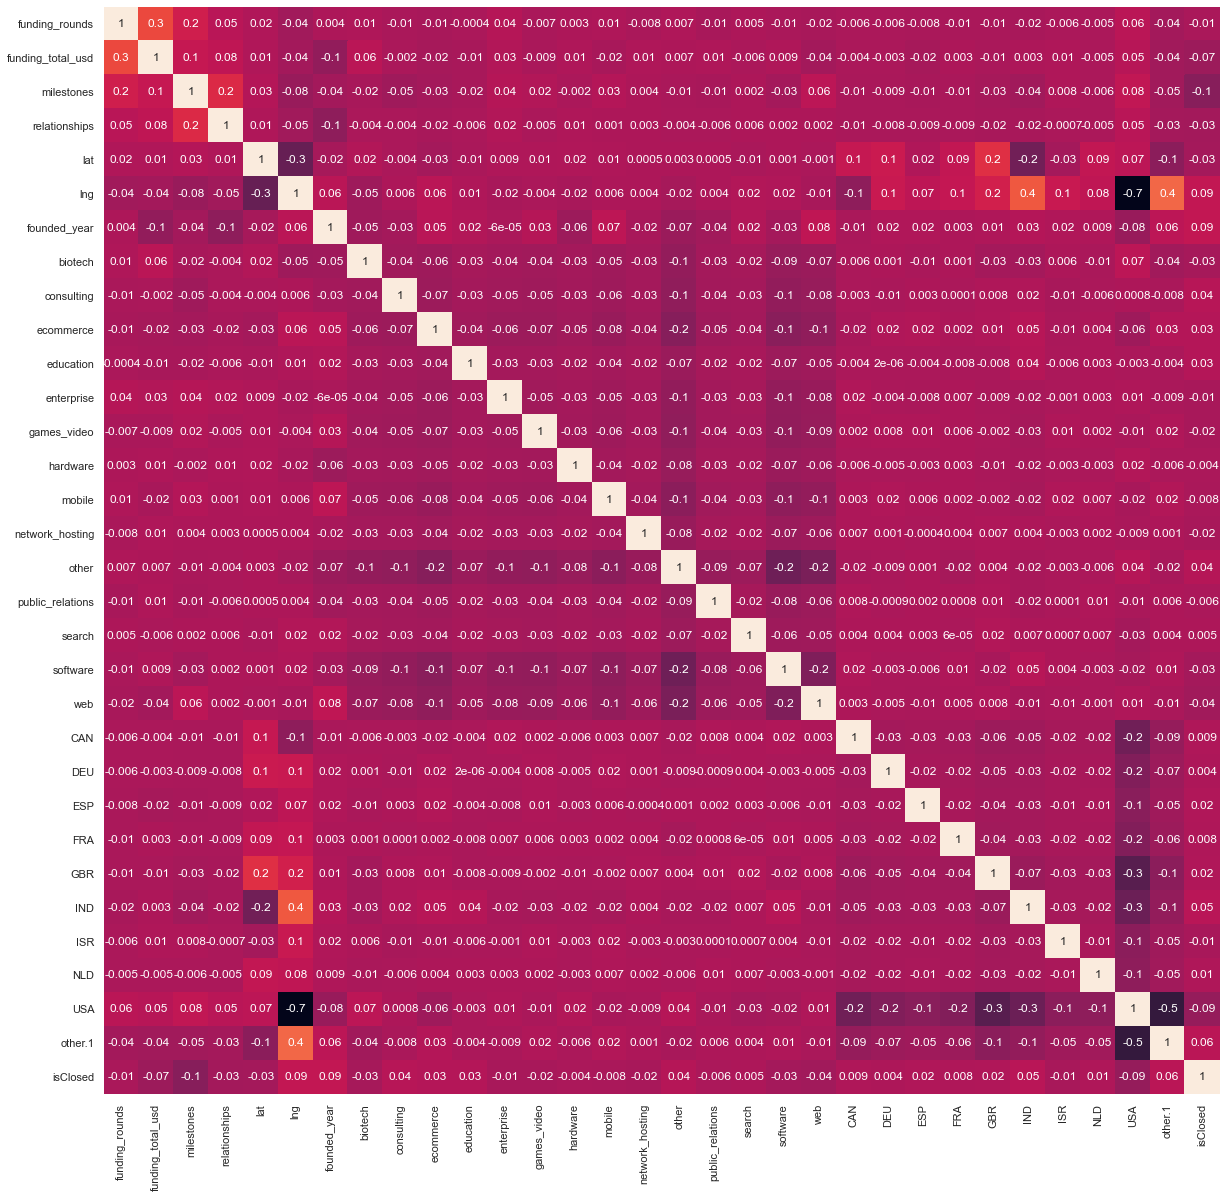

In [5]:
# let's check correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1g',cbar=False)
plt.show()

###### After checking correlation matrix we found that most of the variables having very less correlation with the target variable. While "USA" and "Lat" variable having high degree of negative corrleation.

### Handling Imbalanced data

#### Splitting dataset into training and testings 

In [6]:
# Independent and Dependent variable
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

print("Successfully splitted data into training and testing.")
print("Independent columns training dataset -",x_train.shape)
print("Dependent columns training dataset -",y_train.shape)
print("Independent columns testing dataset -",x_test.shape)
print("Dependent columns testing dataset -",y_test.shape)

Successfully splitted data into training and testing.
Independent columns training dataset - (45013, 31)
Dependent columns training dataset - (45013,)
Independent columns testing dataset - (15005, 31)
Dependent columns testing dataset - (15005,)


#### Scaling data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# fitting x_train data for scaling
scale = StandardScaler()
scale.fit(x_train)

StandardScaler()

In [10]:
# Transforming x_train data into scaled data
scaled_train = scale.transform(x_train)
x_train = pd.DataFrame(data=scaled_train, columns= x_train.columns)
x_train

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,founded_year,biotech,consulting,ecommerce,...,CAN,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other.1
0,4.204266,7.403083,-0.729682,0.184069,0.110492,-0.401301,0.252382,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
1,0.000462,0.001146,-0.729682,0.184069,0.905442,0.705955,0.150753,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,3.329756,-0.227064,-0.114251,-0.105555,-1.140272,-0.438703
2,-1.135186,-0.169357,0.002962,0.000532,-0.162760,-0.431517,0.354011,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
3,-1.135186,2.562185,0.002962,0.619133,-0.268159,-0.683329,-0.560648,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
4,0.000462,0.001146,0.002962,0.000532,0.914910,0.702178,-0.459019,-0.184834,-0.220662,3.410265,...,-0.211768,-0.153864,-0.120382,-0.144287,3.329756,-0.227064,-0.114251,-0.105555,-1.140272,-0.438703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45008,0.000462,0.001146,0.002962,0.000532,0.319735,-0.496945,-0.560648,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
45009,0.000462,0.001146,-0.729682,1.663289,0.657795,-1.052091,-0.967163,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
45010,0.000462,0.001146,0.002962,-0.250996,0.294171,-0.552860,-0.357391,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
45011,4.204266,1.331087,0.002962,-0.076970,1.034755,-0.924902,0.455640,-0.184834,-0.220662,-0.293232,...,4.722145,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,-1.140272,-0.438703


In [11]:
# Transforming x_test data into scaled data using x_train fit
scaled_test = scale.transform(x_test)
x_test = pd.DataFrame(data=scaled_test, columns =x_test.columns)
x_test

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,founded_year,biotech,consulting,ecommerce,...,CAN,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other.1
0,0.000462,0.001146,1.323748,0.184069,0.294171,-0.552860,0.455640,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
1,0.000462,0.001146,0.002962,0.000532,0.657795,-1.052091,0.252382,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
2,0.000462,0.001146,-0.729682,-0.250996,-0.002419,0.002841,0.658897,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
3,0.000462,0.001146,0.002962,0.000532,-1.020381,1.755550,0.354011,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,4.404039,-0.114251,-0.105555,-1.140272,-0.438703
4,0.000462,0.001146,0.002962,-0.163983,0.764222,-1.063437,0.658897,-0.184834,-0.220662,-0.293232,...,4.722145,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,-1.140272,-0.438703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,0.000462,0.001146,0.002962,0.000532,-4.985180,3.222146,0.658897,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,-1.140272,2.279445
15001,0.000462,0.001146,0.002962,-0.250996,0.931918,0.772210,0.150753,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,9.473754,-1.140272,-0.438703
15002,-1.135186,-1.378092,0.002962,-0.250996,-0.282446,-0.974845,0.557268,5.410269,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
15003,-1.135186,-0.472861,-0.729682,0.184069,-0.002419,0.002841,0.455640,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703


#### Imbalanced data

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
over_samp = RandomOverSampler(sampling_strategy='auto', random_state=0)
x_train,y_train = over_samp.fit_resample(x_train,y_train)

In [14]:
x_train

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,founded_year,biotech,consulting,ecommerce,...,CAN,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other.1
0,4.204266,7.403083,-0.729682,0.184069,0.110492,-0.401301,0.252382,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
1,0.000462,0.001146,-0.729682,0.184069,0.905442,0.705955,0.150753,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,3.329756,-0.227064,-0.114251,-0.105555,-1.140272,-0.438703
2,-1.135186,-0.169357,0.002962,0.000532,-0.162760,-0.431517,0.354011,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
3,-1.135186,2.562185,0.002962,0.619133,-0.268159,-0.683329,-0.560648,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
4,0.000462,0.001146,0.002962,0.000532,0.914910,0.702178,-0.459019,-0.184834,-0.220662,3.410265,...,-0.211768,-0.153864,-0.120382,-0.144287,3.329756,-0.227064,-0.114251,-0.105555,-1.140272,-0.438703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82549,1.534540,6.604866,0.002962,-0.250996,0.012556,-1.049372,-0.560648,5.410269,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
82550,-1.135186,0.001146,0.002962,0.000532,-0.002419,0.002841,-0.052504,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
82551,4.204266,6.356023,3.377178,0.184069,0.011028,-0.668708,-0.154133,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703
82552,1.534540,-0.687402,3.377178,0.184069,0.657795,-1.052091,0.354011,-0.184834,-0.220662,-0.293232,...,-0.211768,-0.153864,-0.120382,-0.144287,-0.300322,-0.227064,-0.114251,-0.105555,0.876984,-0.438703


## Now we have data ready to use for model building

#### Feature Selection

In [15]:
# Using feature selection method to find best feature useful for model building

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_)

[0.06643528 0.08425362 0.07690817 0.13066684 0.13896722 0.14742021
 0.21406607 0.0096453  0.00718132 0.00606157 0.00549289 0.00546599
 0.00586868 0.00424124 0.00658417 0.00365151 0.0097905  0.00453285
 0.00312651 0.00896501 0.00825025 0.00292067 0.00249507 0.00211555
 0.00239502 0.00385062 0.00891427 0.00262301 0.00170159 0.0171552
 0.00825382]


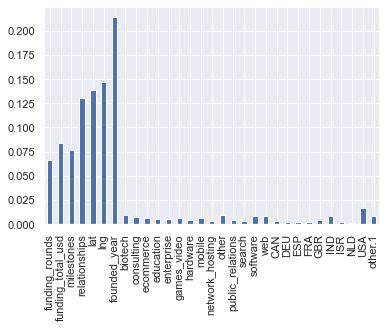

In [16]:
# checking features using barchart
features_selection = pd.Series(data = model.feature_importances_, index=x_train.columns)
features_selection.plot(kind='bar')